# Brief Report
By screening the structures of the seven datasets, I narrowed the question to individual cases and timelines regarding the health status. In this case, I used datasets, 'covid_19_data.csv' for geo analysis and 'COVID19_line_list_data.csv' for further data analysis.

First, I conducted EDA. Most cases happened between the ages of 30 and 70. I was interested in the health status after infection (death, sick and recovery) in relation to age, gender, location, time without symptoms (latent period) (symptom_onset ~ exposure_start)
, time without treatment after having symptoms (hosp_visit_date ~ symptom_onset), and time without treatment after infection (hosp_visit_date ~ exposure_start).

Second, from the plots, I could observe the salient factors were age and sympton_to_hospital. I brought up the hypothesis questions: would the above two factors effectively predict the health status afterwards?

The final result showed that the the precision of sick prediciton was ok (0.91), but further investigation of death and recovered cases were needed due to the small sample sizes of these two categories.

In [61]:
import numpy as np
import pandas as pd

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]

In [63]:
ncov1 = pd.read_csv('2019_nCoV_data.csv')
ncov2 = pd.read_csv('covid_19_data.csv')
nlist = pd.read_csv('COVID19_line_list_data.csv')
nopen = pd.read_csv('COVID19_open_line_list.csv')
cnfm = pd.read_csv('time_series_covid_19_confirmed.csv')
dth = pd.read_csv('time_series_covid_19_deaths.csv')
rcv = pd.read_csv('time_series_covid_19_recovered.csv')

In [64]:
ncov1.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [65]:
ncov2.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [66]:
nlist.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
nopen.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
cnfm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [69]:
dth.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


# Trend by Continent

In [70]:
### Referenced https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

alternative_country_region_names = {
    'Mainland China': 'China',
    'US': 'United States',
    'UK': 'United Kingdom',
    'North Ireland': 'United Kingdom',
    'Saint Barthelemy': 'Saint Barthélemy',
    'Republic of Ireland': 'Ireland',
}

def get_continent_name(country_region_name):
    country_region_name = country_region_name.strip()
    if country_region_name == 'Others':
        return country_region_name
    if country_region_name == 'Vatican City':
        return 'Europe'
    if country_region_name in alternative_country_region_names:
        country_region_name = alternative_country_region_names[country_region_name]
    country_region_code = pc.country_name_to_country_alpha2(country_region_name, cn_name_format="default")
    continent_short_name = pc.country_alpha2_to_continent_code(country_region_code)
    return continents[continent_short_name]

In [71]:
ncov2['Continent'] = ncov2.apply(lambda row: get_continent_name(row['Country/Region']), axis=1)
ncov2_sum = ncov2.groupby(['ObservationDate', 'Continent']).sum().reset_index().drop(columns=['SNo'])
ncov2_sum = ncov2_sum.pivot(index='ObservationDate', columns='Continent', values=['Confirmed', 'Deaths', 'Recovered'])
ncov2_sum.head()

Confirmed                                                \
Continent          Africa    Asia Australia Europe North America Others   
ObservationDate                                                           
01/22/2020            NaN   554.0       NaN    NaN           1.0    NaN   
01/23/2020            NaN   652.0       0.0    NaN           1.0    NaN   
01/24/2020            NaN   937.0       NaN    2.0           2.0    NaN   
01/25/2020            NaN  1429.0       4.0    3.0           2.0    NaN   
01/26/2020            NaN  2105.0       4.0    3.0           6.0    NaN   

                              Deaths                  ...                \
Continent       South America Africa  Asia Australia  ... North America   
ObservationDate                                       ...                 
01/22/2020                NaN    NaN  17.0       NaN  ...           0.0   
01/23/2020                0.0    NaN  18.0       0.0  ...           0.0   
01/24/2020                NaN    NaN  26.0       NaN  ...           0.0   
01/25/2020                NaN    NaN  42.0       0.0  ...           0.0   
01/26/2020                NaN    NaN  56.0       0.0  ...           0.0   

                                     Recovered                         \
Continent       Others South America    Africa  Asia Australia Europe   
ObservationDate                                                         
01/22/2020         NaN           NaN       NaN  28.0       NaN    NaN   
01/23/2020         NaN           0.0       NaN  30.0       0.0    NaN   
01/24/2020         NaN           NaN       NaN  36.0       NaN    0.0   
01/25/2020         NaN           NaN       NaN  39.0       0.0    0.0   
01/26/2020         NaN           NaN       NaN  52.0       0.0    0.0   

                                                    
Continent       North America Others South America  
ObservationDate                                     
01/22/2020                0.0    NaN           NaN  
01/23/2020                0.0    NaN           0.0  
01/24/2020                0.0    NaN           NaN  
01/25/2020                0.0    NaN           NaN  
01/26/2020                0.0    NaN           NaN  

[5 rows x 21 columns]

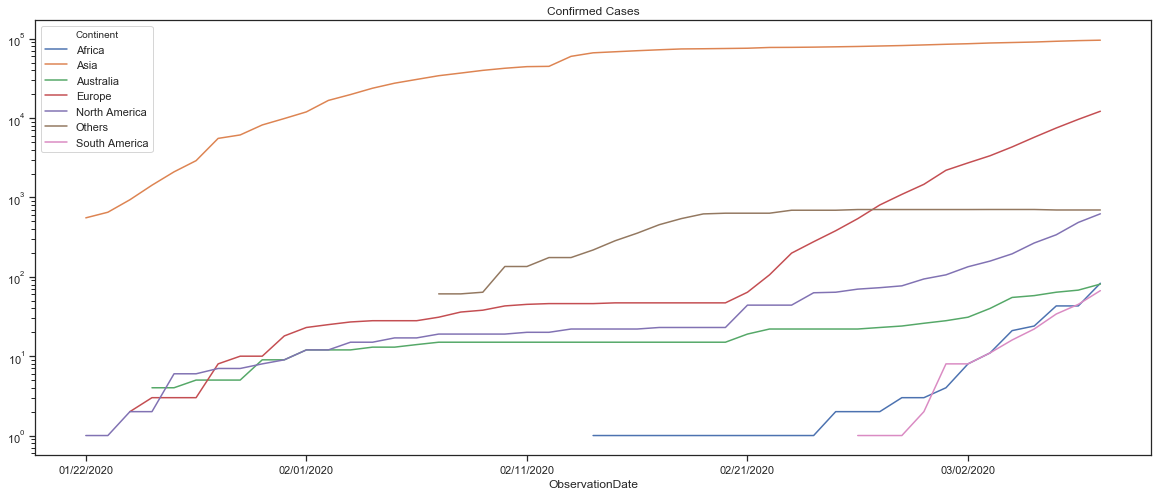

In [72]:
_ = ncov2_sum.loc[:, 'Confirmed'].plot(logy=True, title='Confirmed Cases')

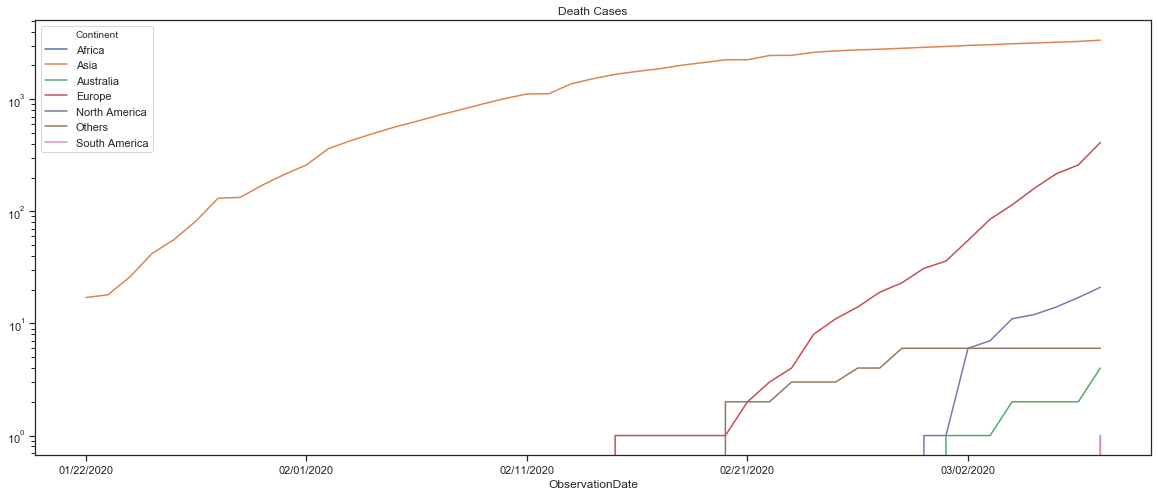

In [73]:
_ = ncov2_sum.loc[:, 'Deaths'].plot(logy=True, title="Death Cases")

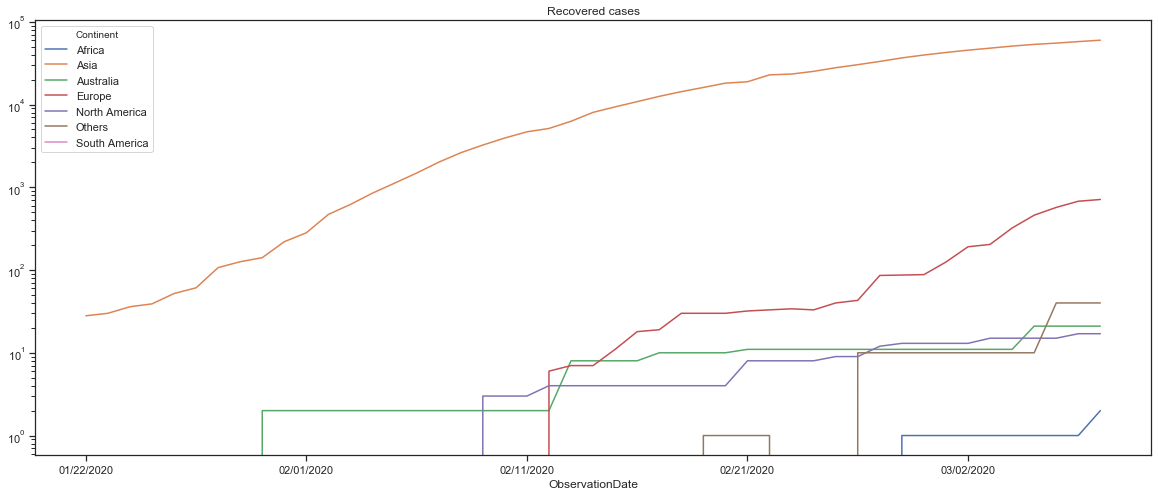

In [74]:
_ = ncov2_sum.loc[:, 'Recovered'].plot(logy=True, title='Recovered cases')

# Explotory data analyses

By screening the structures of the seven datasets, I narrowed the question to individual cases and timelines regarding the health status. In this case, I used datasets: 'COVID19_line_list_data.csv'.

First, I conducted EDA. Most cases happened between the ages of 30 and 70. I was interested in the health status after infection (death, sick and recovery) in relation to age, gender, location, time without symptoms (latent period) (symptom_onset ~ exposure_start)
, time without treatment after having symptoms (hosp_visit_date ~ symptom_onset), and time without treatment after infection (hosp_visit_date ~ exposure_start).

In [75]:
nlist = nlist.dropna(axis=1, how='all') # drop all the empty columns

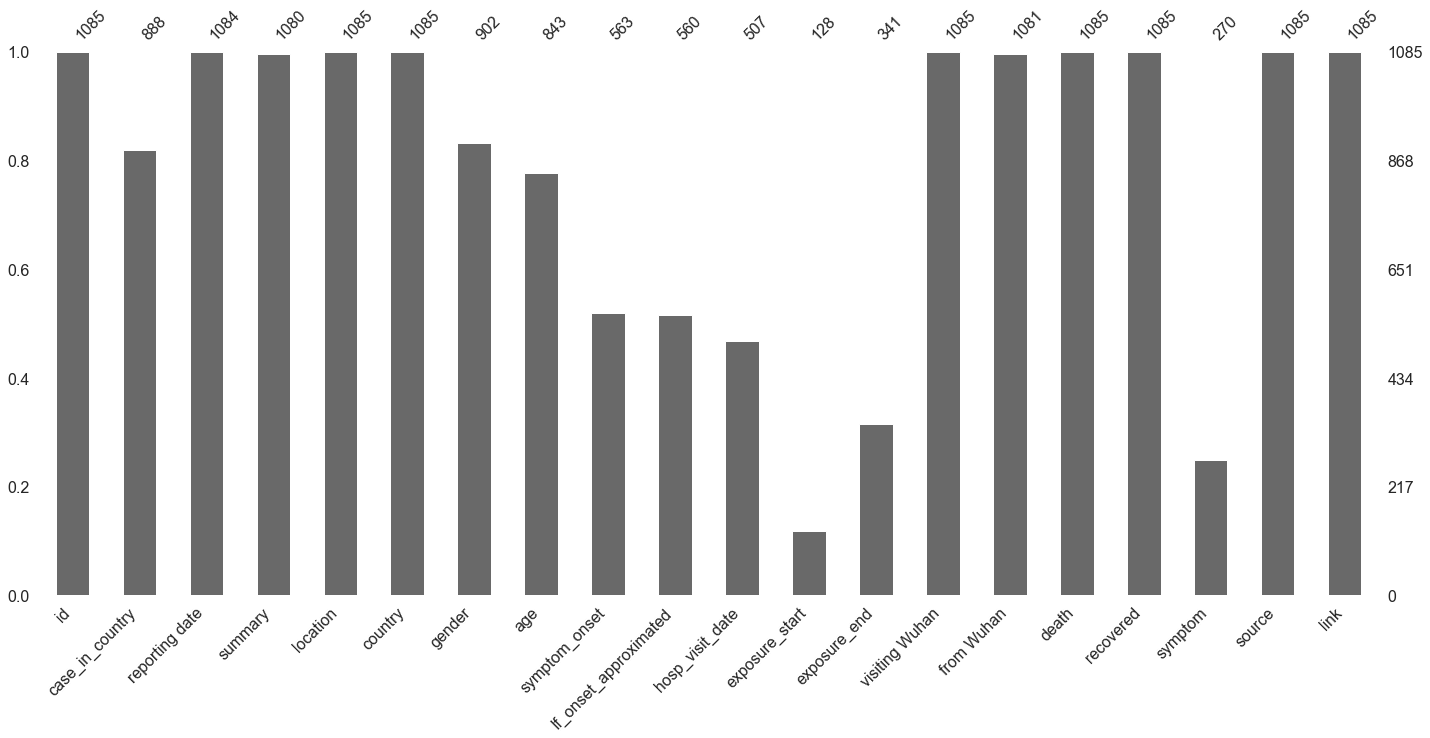

In [76]:
import missingno as msno 
_ = msno.bar(nlist)

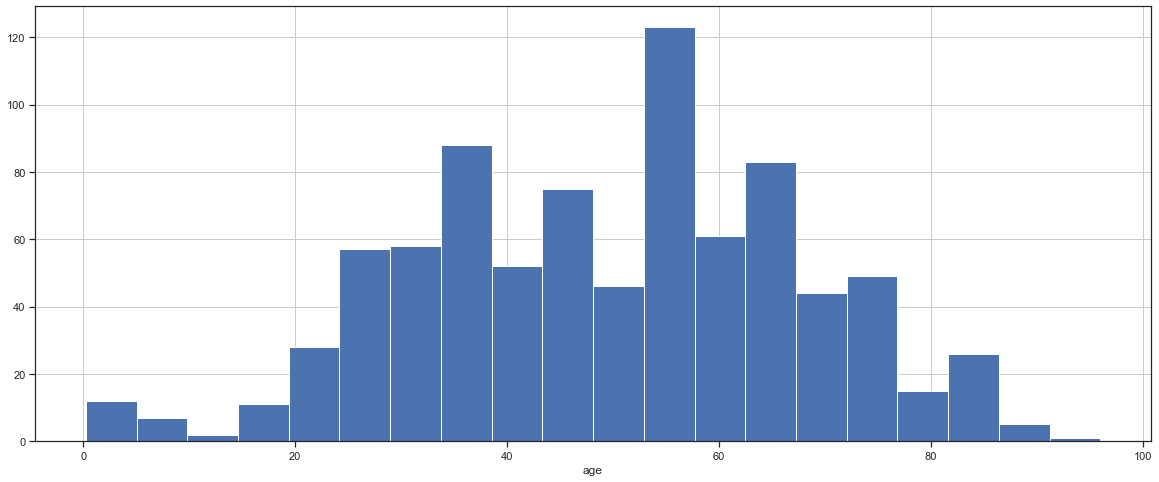

In [77]:
nlist['age'].hist(bins=20)
_ = plt.xlabel('age')

In [78]:
nlist = nlist[
    ((nlist['death'] == '0') | (nlist['death'] == '1')) 
    & ((nlist['recovered'] == '0') | (nlist['recovered'] == '1'))
]
nlist['death'] = nlist['death'].astype('int')
nlist['recovered'] = nlist['recovered'].astype('int')
nlist.shape

(912, 20)

In [79]:
for c in ['hosp_visit_date', 'exposure_start', 'exposure_end', 'symptom_onset']:
    nlist[c] = nlist[c].astype('datetime64[ns]') # string type converted to time
nlist.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0.0,2020-01-11,2019-12-29,2020-01-04,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,2020-01-15,NaT,2020-01-12,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,0.0,2020-01-17,NaT,2020-01-03,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,NaN,2020-01-19,NaT,NaT,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,NaN,2020-01-14,NaT,NaT,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [80]:
# add three time length variables
nlist['exposure_to_hospital'] = (nlist['hosp_visit_date'] - nlist['exposure_start']).dt.days
nlist['exposure_to_symptom'] = (nlist['symptom_onset'] - nlist['exposure_start']).dt.days
nlist['symptom_to_hospital'] = (nlist['hosp_visit_date'] - nlist['symptom_onset']).dt.days
nlist.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,exposure_to_hospital,exposure_to_symptom,symptom_to_hospital
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0.0,...,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,13.0,5.0,8.0
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,...,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,0.0
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,0.0,...,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,13.0
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,NaN,...,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,NaN,...,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN


In [81]:
# add a health status variable (0: death; 1: sick; 2: recovered)
def get_status(death, recovered):
    if death != 0:
        return 0
    if recovered != 0:
        return 2
    return 1
nlist['status'] = nlist.apply(lambda row: get_status(row['death'], row['recovered']), axis=1)
nlist.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,from Wuhan,death,recovered,symptom,source,link,exposure_to_hospital,exposure_to_symptom,symptom_to_hospital,status
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0.0,...,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,13.0,5.0,8.0,1
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,...,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,0.0,1
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,0.0,...,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,13.0,1
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,NaN,...,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,1
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,NaN,...,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,1


In [82]:
# convert gender to int
nlist['gender'] = nlist['gender'].apply(lambda x: 0 if x == 'male' else 1)

In [83]:
# look at the death ratio per location
death_df = nlist[['location', 'death']]
death_count = death_df.groupby('location').sum()
total_count = death_df.groupby('location').count()
death_ratio = death_count / total_count
death_ratio[death_ratio['death'] > 0]

,death
location,
Hong Kong,0.012500
Hubei,0.777778
Kowloon,0.333333
Taiwan,0.029412
"Wuhan, Hubei",1.000000


In [84]:
sns.set(style="ticks", color_codes=True)

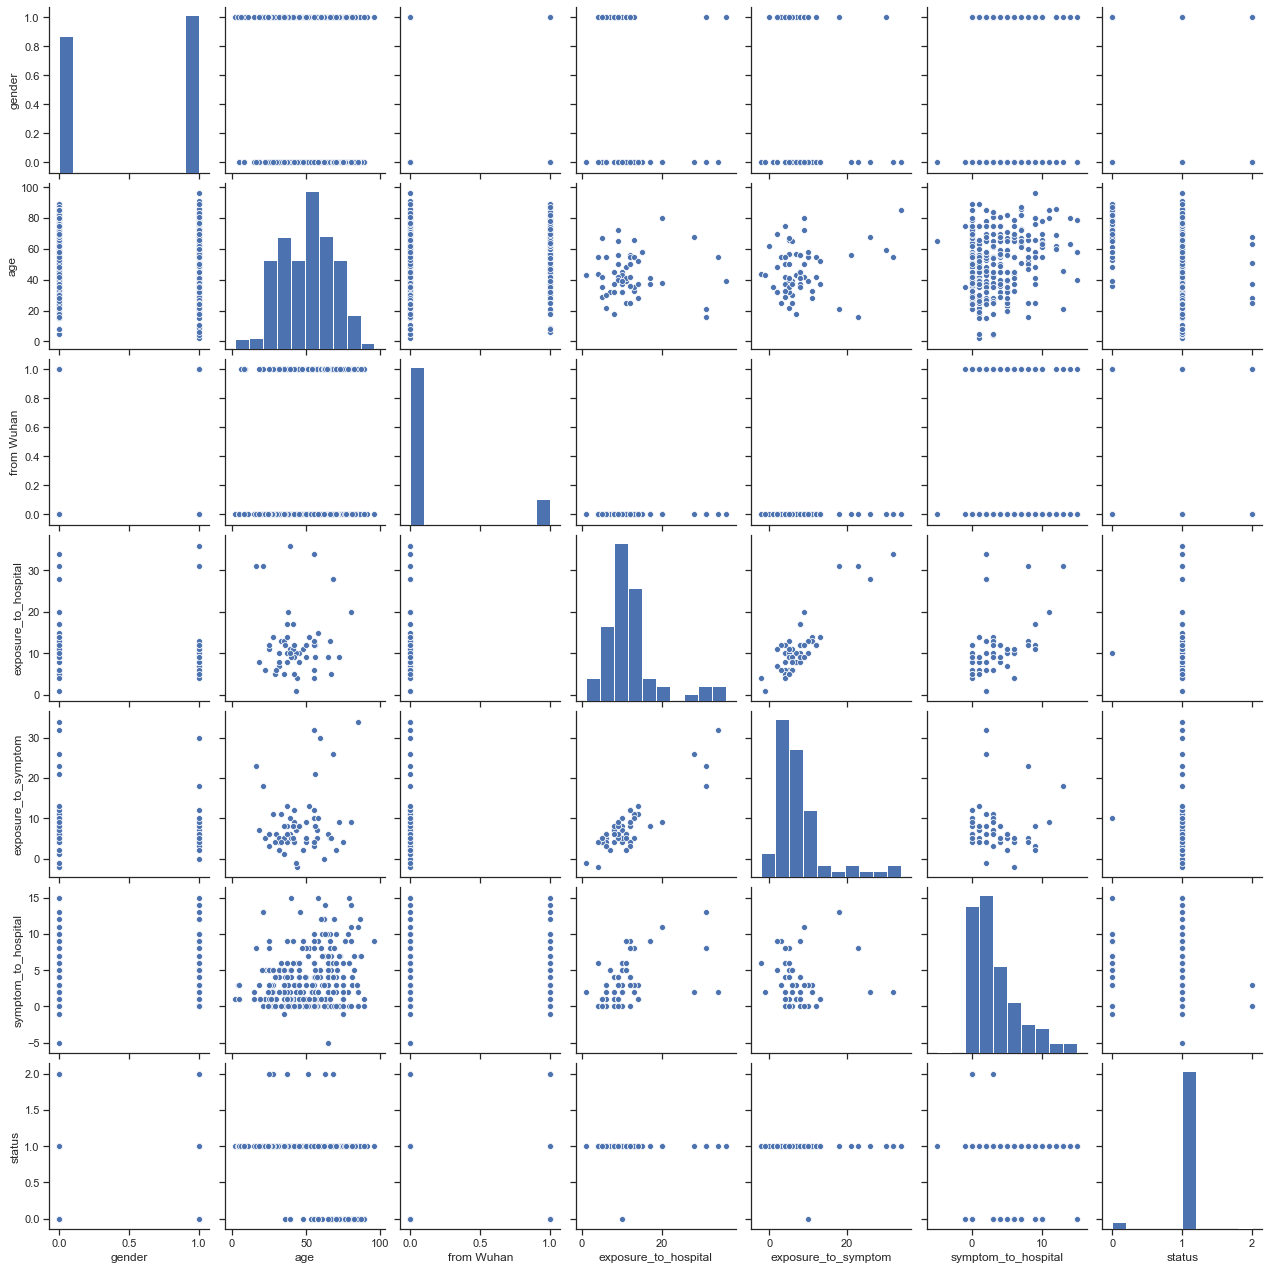

In [85]:
nlist_to_plot = nlist.drop(columns = ['id', 'case_in_country', 'If_onset_approximated', 'visiting Wuhan', 'death', 'recovered'])
g = sns.pairplot(nlist_to_plot)

# Logistic Regression

Second, from the plots, I could observe the salient factors were age and sympton_to_hospital. I brought up the hypothesis questions:
Would the above two factors effectively predict the health status afterwards?

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [87]:
data = nlist[['age', 'symptom_to_hospital', 'status']]
data = data.dropna(axis=0, how='any')
data.shape

(359, 3)

In [88]:
X = data[['age', 'symptom_to_hospital']]
y = data['status']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction, Evaluation

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
predictions = logmodel.predict(X_test)

In [94]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.92      0.96      0.94       164
           2       0.00      0.00      0.00         2

    accuracy                           0.89       180
   macro avg       0.39      0.37      0.37       180
weighted avg       0.86      0.89      0.87       180

[[  2  12   0]
 [  6 158   0]
 [  0   2   0]]
